In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_excel('C:/Users/ELCOT/Desktop/LU ass/Day_24 materials/Bank_Personal_Loan_Modelling.xlsx',sheet_name=1)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.shape

(5000, 14)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
df.drop(columns=['ID','ZIP Code'],axis=1,inplace=True)

In [9]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [10]:
import ipywidgets as widgets
def f(columns):
    sns.distplot(df[columns])
    plt.show()
widgets.interact(f,columns=['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']);

interactive(children=(Dropdown(description='columns', options=('Age', 'Experience', 'Income', 'CCAvg', 'Mortga…

In [11]:
@widgets.interact(columns=['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage'])
# columns = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
def f(columns):
    sns.boxplot(df[columns]);

interactive(children=(Dropdown(description='columns', options=('Age', 'Experience', 'Income', 'Family', 'CCAvg…

In [12]:
@widgets.interact(Column_1 = df.columns,Column_2="Personal Loan")

def f(Column_1,Column_2):
    return df[Column_1].corr(df[Column_2])

interactive(children=(Dropdown(description='Column_1', options=('Age', 'Experience', 'Income', 'Family', 'CCAv…

In [13]:
X = df.drop('Personal Loan',axis=1)
y = df['Personal Loan']

In [14]:

# Spiltting data into training set and test test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [15]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000,
                             max_features=2,
                             oob_score=True)
# fit model

clf.fit(X_train,y_train);

In [16]:
clf.oob_score_

0.9865

In [17]:
# Find most relevent columns for predicting Personal Loan
for feature,imp_col in zip(X.columns,clf.feature_importances_):
    print(f'{feature} :: {imp_col}')

Age :: 0.04573462378039789
Experience :: 0.04540330051202538
Income :: 0.3516569422877412
Family :: 0.09805733435591059
CCAvg :: 0.17975164298035784
Education :: 0.16020229446490458
Mortgage :: 0.04630633842013515
Securities Account :: 0.005708841024379277
CD Account :: 0.04915057671119375
Online :: 0.008403866798707598
CreditCard :: 0.009624238664246831


infer:

Income, CCAvg, Education, Family and Cd account have value more than 0.05 ie, They are Important feature and affect the prediction of Personal Loan

In [19]:
# Drop unimportant columns from X data

X.drop(columns=['Age','Experience','Mortgage','Securities Account','Online','CreditCard'],axis=1,inplace=True)

In [20]:
X.head()

,Income,Family,CCAvg,Education,CD Account
0,49,4,1.6,1,0
1,34,3,1.5,1,0
2,11,1,1.0,1,0
3,100,1,2.7,2,0
4,45,4,1.0,2,0


In [22]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

In [23]:

# Using Important features we are gonna use decision tree to predict the Loan

from sklearn.tree import DecisionTreeClassifier

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=2)


# fit data to model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train);

In [24]:
clf.score(X_test,y_test)

0.984

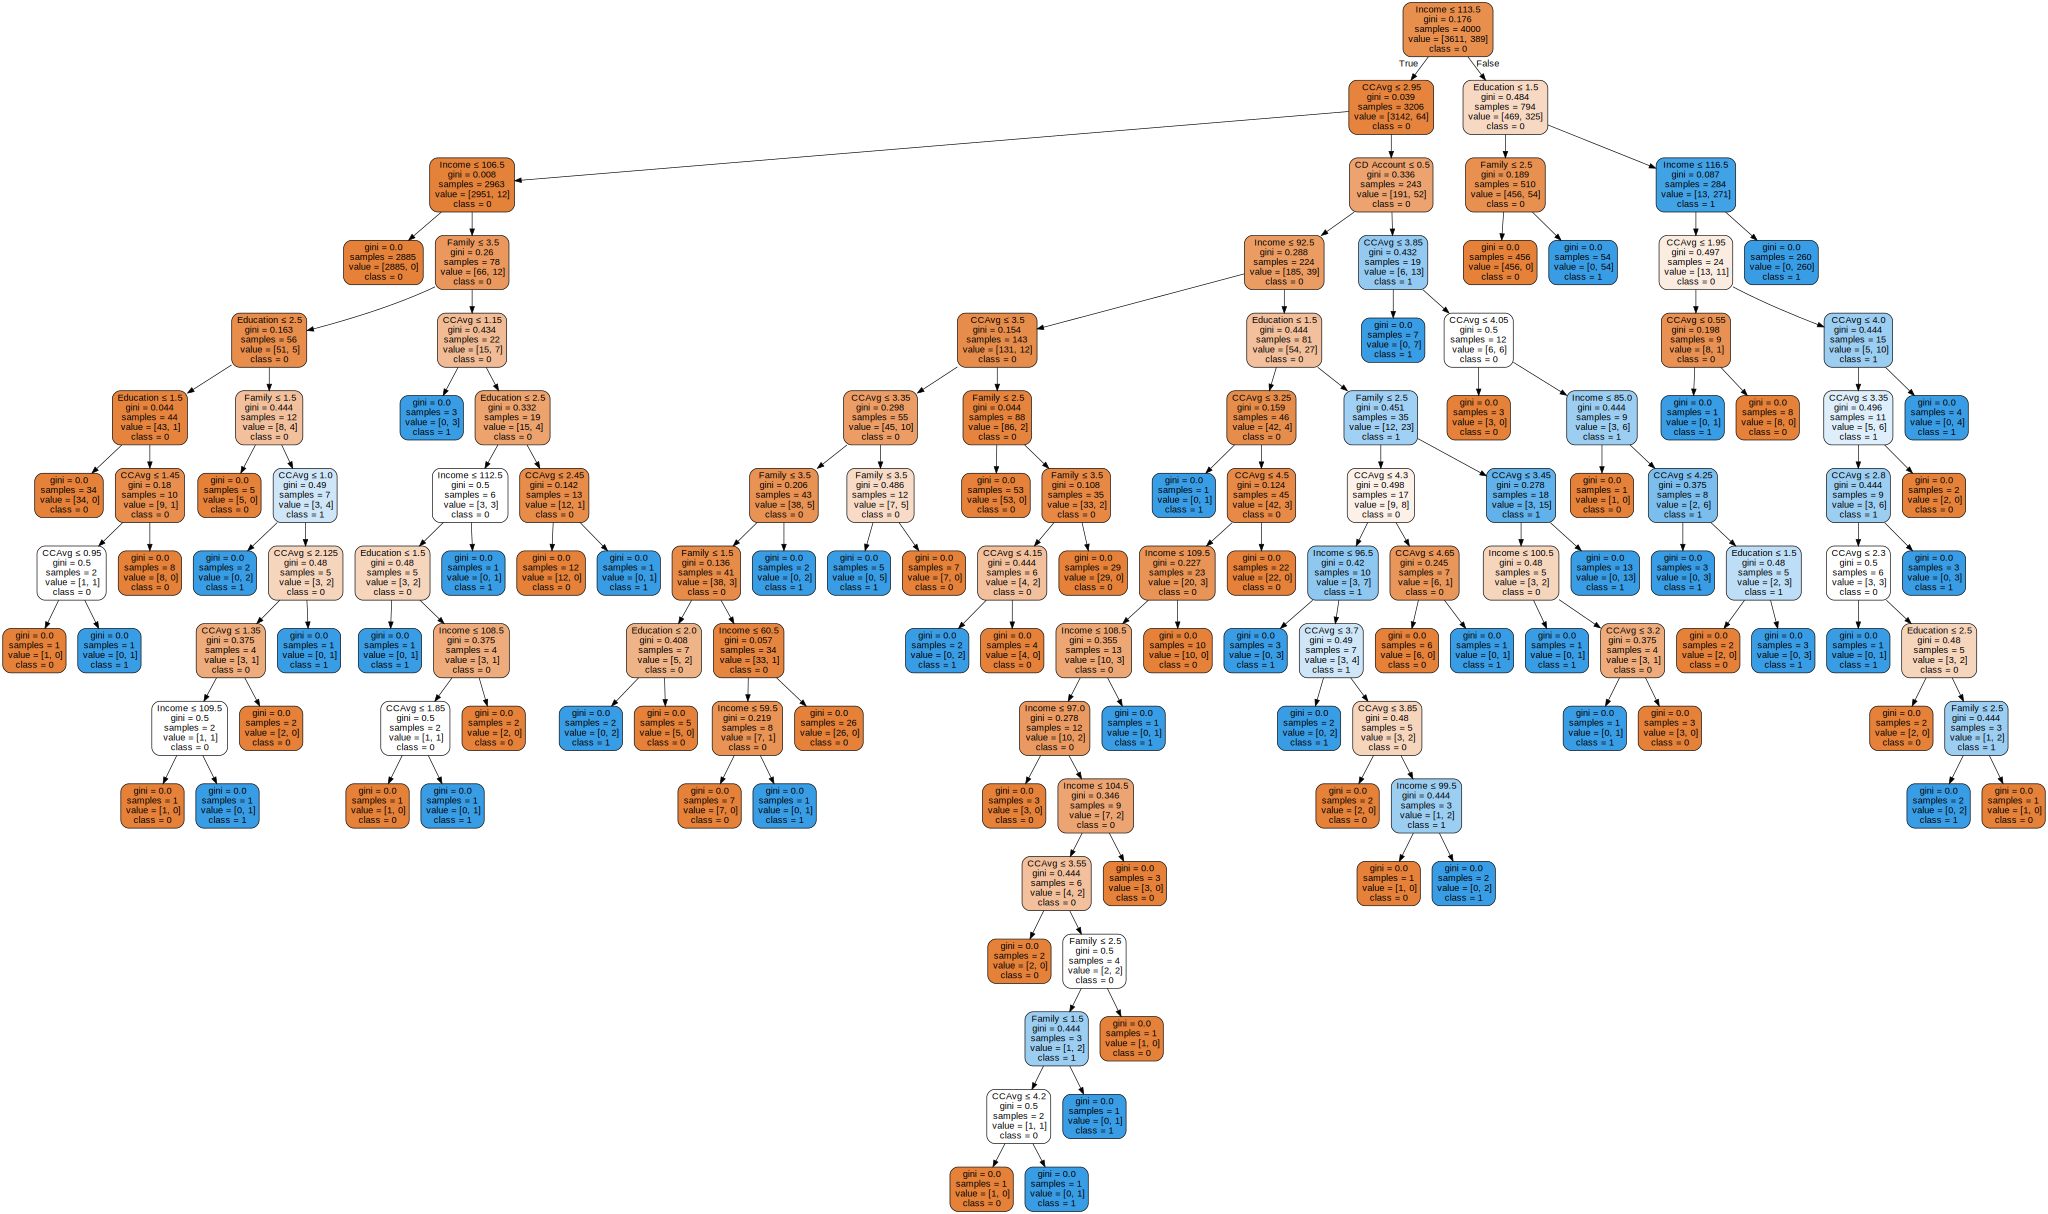

In [25]:
from graphviz import Source
from sklearn import tree
data = tree.export_graphviz(clf,feature_names=X.columns,
                            class_names=['0','1'],
                            filled=True,
                            rounded = True,
                            special_characters=True,
                            out_file=None)
graph = Source(data)
graph

In [26]:
y_preds = clf.predict(X_test)
y_preds[:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [27]:
# Compare with y_test,y_preds

preds = pd.DataFrame({"y_test":y_test,'y_preds':y_preds})
preds.head(10)

,y_test,y_preds
3566,0,0
4252,0,0
1918,1,1
4111,0,0
1471,0,0
929,0,0
1916,0,0
3995,0,0
1130,0,0
1723,0,0
